In [2]:
import pandas as pd
#load the data
data1 = pd.read_csv("C:/Users/sriva/Downloads/acs2017_census_tract_data.csv")
entries = []

county = data1["County"].unique()

for county in county:
    county_data = data1[data1['County'] == county]
    states = county_data['State'].unique()

    # Iterate through each state for the current county
    for state in states:
        state_county_data = county_data[county_data['State'] == state]
        total_population = state_county_data['TotalPop'].sum()
        poverty = state_county_data['TotalPop'] * (state_county_data['Poverty'] / 100)
        poverty_percent = (poverty.sum() / total_population) * 100
        total_incomes_per_population = state_county_data['TotalPop'] * state_county_data['IncomePerCap']
        total_income_per_capita = total_incomes_per_population.sum() / total_population

        entries.append([
            state,
            county.replace(" County", ""),
            total_population,
            poverty_percent,
            total_income_per_capita
        ])

County_Info = pd.DataFrame(entries, columns=['State', 'County', 'Total Population', 'Poverty %', 'Per Capita Income'])
County_Info['ID'] = County_Info.index + 1
#reorder columns
County_Info = County_Info[['ID','State', 'County', 'Total Population', 'Poverty %', 'Per Capita Income']]

,ID,State,County,Total Population,Poverty %,Per Capita Income
0,1,Alabama,Autauga,55036,13.756290,27823.920161
1,2,Alabama,Baldwin,203360,11.869656,29364.365583
2,3,Georgia,Baldwin,45527,28.665493,20113.410328
3,4,Alabama,Barbour,26201,26.867990,17561.086981
4,5,West Virginia,Barbour,16790,22.967516,20761.609827


In [5]:
loudoun_info = County_Info[(County_Info['County'] == 'Loudoun') & (County_Info['State'] == 'Virginia')]
print(loudoun_info)

        ID     State   County  Total Population  Poverty %  Per Capita Income
3000  3001  Virginia  Loudoun            374558   3.689598       50455.645745


In [7]:
washington_info = County_Info[(County_Info['County'] == 'Washington') & (County_Info['State'] == 'Oregon')]
print(washington_info)

      ID   State      County  Total Population  Poverty %  Per Capita Income
426  427  Oregon  Washington            572071  10.321202       35369.047499


In [8]:
harlan_info = County_Info[(County_Info['County'] == 'Harlan') & (County_Info['State'] == 'Kentucky')] 
print(harlan_info)

        ID     State  County  Total Population  Poverty %  Per Capita Income
1824  1825  Kentucky  Harlan             27548  35.669482       15456.971032


In [9]:
malheur_info = County_Info[(County_Info['County'] == 'Malheur') & (County_Info['State'] == 'Oregon')] 
print(malheur_info)

        ID   State   County  Total Population  Poverty %  Per Capita Income
2629  2630  Oregon  Malheur             30421  24.298225       17567.504323


In [11]:
most_populous_county = County_Info.sort_values(by='Total Population', ascending=False).iloc[0]

print(f"Most populous county in the USA:{most_populous_county}")

Most populous county in the USA:ID                            783
State                  California
County                Los Angeles
Total Population         10105722
Poverty %               16.998271
Per Capita Income    30798.189407
Name: 782, dtype: object


In [12]:
least_populous_county = County_Info.sort_values(by='Total Population', ascending=True).iloc[0]

print(f"Least populous county in the USA:{least_populous_county}")

Least populous county in the USA:ID                      2878
State                  Texas
County                Loving
Total Population          74
Poverty %               17.1
Per Capita Income    35530.0
Name: 2877, dtype: object


In [14]:
covid_data = pd.read_csv("C:/Users/sriva/Downloads/COVID_county_data.csv")
covid_data['date'] = pd.to_datetime(covid_data['date'])
covid_data['Month'] = covid_data['date'].dt.strftime('%Y-%m')
covid_month = covid_data.groupby(['county', 'state', 'Month']).agg({
    'cases': 'sum',
    'deaths': 'sum'
}).reset_index()
County_Info['CountyState'] = County_Info['County'] + ", " + County_Info['State']
covid_month['CountyState'] = covid_month['county'] + ", " + covid_month['state']

# Map IDs from County_info to covid_month
covid_month['CountyID'] = covid_month['CountyState'].map(County_Info.set_index('CountyState')['ID'])

In [15]:
print(covid_month[(covid_month['CountyState'] == 'Malheur, Oregon') & (covid_month['Month'] == '2020-08') & (covid_month['state'] == 'Oregon')])

        county   state    Month  cases  deaths      CountyState  CountyID
20782  Malheur  Oregon  2020-08  28163   459.0  Malheur, Oregon    2630.0


In [16]:
print(covid_month[(covid_month['CountyState'] == 'Malheur, Oregon') & (covid_month['Month'] == '2021-01') & (covid_month['state'] == 'Oregon')])

        county   state    Month  cases  deaths      CountyState  CountyID
20787  Malheur  Oregon  2021-01  96297  1627.0  Malheur, Oregon    2630.0


In [17]:
print(covid_month[(covid_month['CountyState'] == 'Malheur, Oregon') & (covid_month['Month'] == '2021-02') & (covid_month['state'] == 'Oregon')])

        county   state    Month  cases  deaths      CountyState  CountyID
20788  Malheur  Oregon  2021-02  65951  1137.0  Malheur, Oregon    2630.0


In [18]:
# Group by county and state to aggregate cases and deaths for the entire period
total = covid_data.groupby(['county', 'state']).agg({
    'cases': 'sum',  # Sum up cases to get total cases over the entire period
    'deaths': 'sum'
}).reset_index()
covid_summary = pd.merge(total, County_Info, left_on=['county', 'state'], right_on=['County', 'State'])
covid_summary = covid_summary[['County', 'State', 'cases', 'deaths', 'Total Population', 'Poverty %','Per Capita Income']]
# Calculate total cases and deaths per 100,000 population
covid_summary['TotalCasesPer100K'] = (covid_summary['cases'] / covid_summary['Total Population']) * 100000
covid_summary['TotalDeathsPer100K'] = (covid_summary['deaths'] / covid_summary['Total Population']) * 100000
covid_summary.columns
# Calculate total cases and deaths per 100,000 population
covid_summary['TotalCasesPer100K'] = (covid_summary['cases'] / covid_summary['Total Population']) * 100000
covid_summary['TotalDeathsPer100K'] = (covid_summary['deaths'] / covid_summary['Total Population']) * 100000

,County,State,cases,deaths,Total Population,Poverty %,Per Capita Income,TotalCasesPer100K,TotalDeathsPer100K
0,Abbeville,South Carolina,206727,3934.0,24788,22.663628,19234.247176,8.339802e+05,15870.582540
1,Accomack,Virginia,389637,5758.0,32840,19.905271,24265.653959,1.186471e+06,17533.495737
2,Ada,Idaho,5230256,50724.0,435117,11.909603,31642.314649,1.202034e+06,11657.554175
3,Adair,Iowa,70396,1792.0,7192,9.479060,28860.857620,9.788098e+05,24916.573971
4,Adair,Kentucky,178833,8026.0,19304,21.451083,18408.087857,9.264039e+05,41576.875259
...,...,...,...,...,...,...,...,...,...
3063,Yuma,Arizona,4445946,96197.0,204281,19.669674,20599.482375,2.176387e+06,47090.527264
3064,Yuma,Colorado,68447,1016.0,10109,14.272470,24788.361262,6.770897e+05,10050.450094
3065,Zapata,Texas,139632,2031.0,14415,34.052820,17816.874853,9.686576e+05,14089.490114
3066,Zavala,Texas,153660,4211.0,12152,36.275560,13104.867182,1.264483e+06,34652.732061


In [22]:
print(covid_summary[(covid_summary['County'] == 'Washington')& (covid_summary['State'] == 'Oregon')])

          County   State    cases   deaths  Total Population  Poverty %  \
2903  Washington  Oregon  2157339  22455.0            572071  10.321202   

      Per Capita Income  TotalCasesPer100K  TotalDeathsPer100K  
2903       35369.047499      377110.358679          3925.21208  


In [19]:
print(covid_summary[(covid_summary['County'] == 'Loudoun')& (covid_summary['State'] == 'Virginia')])

       County     State    cases   deaths  Total Population  Poverty %  \
1677  Loudoun  Virginia  2496450  35820.0            374558   3.689598   

      Per Capita Income  TotalCasesPer100K  TotalDeathsPer100K  
1677       50455.645745       666505.58792          9563.27191  


In [20]:
print(covid_summary[(covid_summary['County'] == 'Malheur')& (covid_summary['State'] == 'Oregon')])

       County   State   cases  deaths  Total Population  Poverty %  \
1737  Malheur  Oregon  453634  7770.0             30421  24.298225   

      Per Capita Income  TotalCasesPer100K  TotalDeathsPer100K  
1737       17567.504323       1.491187e+06        25541.566681  


In [21]:
print(covid_summary[(covid_summary['County'] == 'Harlan')& (covid_summary['State'] == 'Kentucky')])

      County     State   cases  deaths  Total Population  Poverty %  \
1176  Harlan  Kentucky  205984  3994.0             27548  35.669482   

      Per Capita Income  TotalCasesPer100K  TotalDeathsPer100K  
1176       15456.971032       747727.60273        14498.330187  


In [27]:
oregon_data = covid_summary[covid_summary['State'].str.contains('Oregon')]

print("Oregon Correlations:")
print(f"TotalCases_vs_Poverty: {oregon_data['TotalCasesPer100K'].corr(oregon_data['Poverty %'])}")
print(f"TotalDeaths_vs_Poverty: {oregon_data['TotalDeathsPer100K'].corr(oregon_data['Poverty %'])}")
print(f"TotalCases_vs_Income: {oregon_data['TotalCasesPer100K'].corr(oregon_data['Per Capita Income'])}")
print(f"TotalDeaths_vs_Income: {oregon_data['TotalDeathsPer100K'].corr(oregon_data['Per Capita Income'])}")
print(f"TotalCases_vs_Deaths: {oregon_data['cases'].corr(oregon_data['deaths'])}")

print("\nUSA Correlations:")
print(f"TotalCases_vs_Poverty: {covid_summary['TotalCasesPer100K'].corr(covid_summary['Poverty %'])}")
print(f"TotalDeaths_vs_Poverty: {covid_summary['TotalDeathsPer100K'].corr(covid_summary['Poverty %'])}")
print(f"TotalCases_vs_Income: {covid_summary['TotalCasesPer100K'].corr(covid_summary['Per Capita Income'])}")
print(f"TotalDeaths_vs_Income: {covid_summary['TotalDeathsPer100K'].corr(covid_summary['Per Capita Income'])}")
print(f"TotalCases_vs_Population: {covid_summary['Total Population'].corr(covid_summary['cases'])}")
print(f"TotalCases_vs_Deaths: {covid_summary['cases'].corr(covid_summary['deaths'])}")

Oregon Correlations:
TotalCases_vs_Poverty: 0.28707860802137736
TotalDeaths_vs_Poverty: 0.36053911582413345
TotalCases_vs_Income: -0.3756850276147197
TotalDeaths_vs_Income: -0.46186659505185557
TotalCases_vs_Deaths: 0.97479855471827

USA Correlations:
TotalCases_vs_Poverty: 0.19743877808931917
TotalDeaths_vs_Poverty: 0.2680378406210282
TotalCases_vs_Income: -0.21366063360627474
TotalDeaths_vs_Income: -0.173458350031203
TotalCases_vs_Population: 0.9662049145438587
TotalCases_vs_Deaths: 0.9044409109065387


TotalCases_vs_Deaths Correlation: 0.9044409109065387


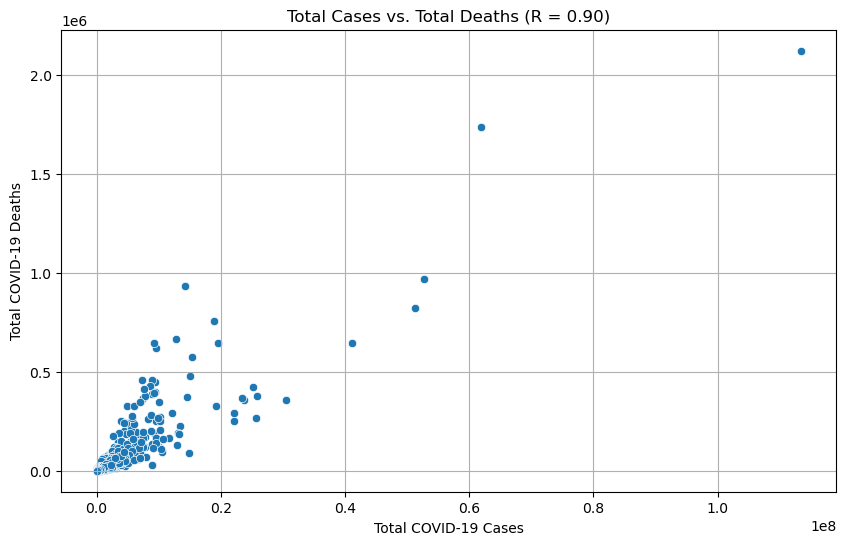

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns


# Calculate the Pearson correlation coefficient
correlation = covid_summary['cases'].corr(covid_summary['deaths'])
print(f"TotalCases_vs_Deaths Correlation: {correlation}")

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=covid_summary['cases'], y=covid_summary['deaths'])
plt.title(f'Total Cases vs. Total Deaths (R = {correlation:.2f})')
plt.xlabel('Total COVID-19 Cases')
plt.ylabel('Total COVID-19 Deaths')
plt.grid(True)
plt.show()